In [ ]:
# 自动重载模块（修改 .py 文件后自动生效）
%load_ext autoreload
%autoreload 2

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

# 导入自定义模块
from pipeline.trading_pipeline import TradingPipeline

# 设置显示选项
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.width', None)

print("✅ 环境配置完成")


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
✅ 环境配置完成


In [ ]:
# 自动重载模块（修改 .py 文件后自动生效）
%load_ext autoreload
%autoreload 2

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

# 导入自定义模块
from pipeline.trading_pipeline import TradingPipeline

# 设置显示选项
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.width', None)

print("✅ 环境配置完成")


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
✅ 环境配置完成


In [ ]:
# ============ 配置参数 ============
# 特征配置
feature_config = {
    'basic': False,
    'orderflow': True,
    'impact': False,
    'volatility': False,
    'path_shape': False,
    'tail': False,
}

# 模型配置
model_config = {
    'random_state': 42
}

# 数据配置
start_date = '2025-01-01'
end_date = '2025-01-01'

# Bar 配置
bar_type = 'time'  # 'dollar' 或 'time'
time_interval = '1h'  # 仅当 bar_type='time' 时有效
dollar_threshold = 10000 * 60000  # 仅当 bar_type='dollar' 时有效

# 文件路径配置
base_path = '/Users/aming/project/python/crypto-trade/output'
data_path_template = '/Volumes/Ext-Disk/data/futures/um/daily/trades/ETHUSDT/ETHUSDT-trades-{date}.zip'
plot_save_dir = '/Users/aming/project/python/crypto-trade/strategy/fusion/pic'

# 根据 bar_type 生成文件名
if bar_type == 'time':
    trades_zip_path = f'{base_path}/trades-{start_date}-{end_date}-{time_interval}.zip'
    bar_zip_path = f'{base_path}/bars-{start_date}-{end_date}-{time_interval}.zip'
else:
    dollar_threshold_str = str(dollar_threshold).replace("*", "_")
    trades_zip_path = f'{base_path}/trades-{start_date}-{end_date}-{dollar_threshold_str}.zip'
    bar_zip_path = f'{base_path}/bars-{start_date}-{end_date}-{dollar_threshold_str}.zip'

# 训练配置
feature_window_bars = 10  # 用于特征提取的历史 bar 数量
model_type = 'linear'  # 'ridge', 'linear', 'lgbm' 等
target_horizon = 5  # 预测的未来 bar 数量
n_splits = 5  # 交叉验证折数
embargo_bars = 3  # 禁运期（避免数据泄漏）

print("📋 配置参数:")
print(f"  数据日期范围: {start_date} ~ {end_date}")
print(f"  Bar类型: {bar_type}")
if bar_type == 'time':
    print(f"  时间间隔: {time_interval}")
else:
    print(f"  Dollar阈值: {dollar_threshold:,}")
print(f"  模型类型: {model_type}")
print(f"  目标预测期: {target_horizon} bars")
print(f"  特征窗口: {feature_window_bars} bars")


📋 配置参数:
  数据日期范围: 2025-01-01 ~ 2025-01-01
  Bar类型: time
  时间间隔: 1h
  模型类型: linear
  目标预测期: 5 bars
  特征窗口: 10 bars


In [ ]:
# 创建 Pipeline 实例
config = {
    'features': feature_config,
    'model': model_config
}

pipeline = TradingPipeline(config)
print("✅ Pipeline 实例创建成功")


✅ Pipeline 实例创建成功


In [ ]:
# 加载交易数据
trades_df = pipeline.load_data(
    trades_zip_path=trades_zip_path,
    date_range=(start_date, end_date),
    data_path_template=data_path_template
)

# print(f"\n✅ 成功加载 {len(trades_df):,} 条交易记录")
# print(f"   时间范围: {trades_df['timestamp'].min()} ~ {trades_df['timestamp'].max()}")
# print(f"   数据形状: {trades_df.shape}")
# print("\n前5行数据:")
trades_df.head()


,id,price,qty,quote_qty,time,is_buyer_maker
0,4936628773,3336.58,6.583,21964.70614,1735689605058,False
1,4936628774,3336.57,0.033,110.10681,1735689605064,True
2,4936628775,3336.58,1.135,3787.01830,1735689605072,False
3,4936628776,3336.57,0.460,1534.82220,1735689605079,True
4,4936628777,3336.57,0.231,770.74767,1735689605079,True


In [ ]:
# 查看交易数据的基本统计信息
print("交易数据统计:")
print(trades_df.describe())


交易数据统计:
                 id         price           qty     quote_qty          time
count  2.495858e+06  2.495858e+06  2.495858e+06  2.495858e+06  2.495858e+06
mean   4.937877e+09  3.345240e+03  5.093558e-01  1.698517e+03  1.735735e+12
std    7.205685e+05  1.130011e+01  4.285225e+00  1.191547e+04  2.421167e+07
min    4.936629e+09  3.312620e+03  1.000000e-03  1.250000e+00  1.735690e+12
25%    4.937253e+09  3.337590e+03  7.000000e-03  2.338903e+01  1.735717e+12
50%    4.937877e+09  3.345440e+03  1.400000e-02  4.691694e+01  1.735738e+12
75%    4.938501e+09  3.353790e+03  1.500000e-01  5.023065e+02  1.735755e+12
max    4.939125e+09  3.374140e+03  3.759398e+03  5.665142e+06  1.735776e+12


In [ ]:
# 构建 Bars
bars = pipeline.build_bars(
    trades_df,
    dollar_threshold=dollar_threshold,
    bar_zip_path=bar_zip_path,
    bar_type=bar_type,
    time_freq=time_interval if bar_type == 'time' else None
)

# print(f"\n✅ 成功构建 {len(bars):,} 个 {bar_type.upper()} Bars")
# print(f"   时间范围: {bars['start_time'].min()} ~ {bars['end_time'].max()}")
# print(f"   数据形状: {bars.shape}")
# print("\n前5个Bars:")
bars.head()


构建Time Bars（freq=1h）...


KeyboardInterrupt: 

In [ ]:
# 提取特征和标签
X, y = pipeline.extract_features(
    trades_df,
    bars,
    feature_window_bars=feature_window_bars
)

# print(f"\n✅ 特征提取完成")
# print(f"   样本数量: {len(X):,}")
# print(f"   特征数量: {len(X.columns)}")
# print(f"   标签数量: {len(y.columns)}")
# print(f"\n特征列:")
print(X.columns.tolist())


构建交易上下文...
提取特征...
['ofi_signed_qty_sum', 'ofi_signed_quote_sum', 'gof_by_count', 'gof_by_volume', 'feature_start', 'feature_end', 'prediction_time']


In [ ]:
# 查看特征数据
print("特征数据前5行:")
display(X.head())

print(f"\n特征统计信息:")
display(X.describe())


特征数据前5行:


,ofi_signed_qty_sum,ofi_signed_quote_sum,gof_by_count,gof_by_volume,feature_start,feature_end,prediction_time
bar_id,,,,,,,
10,-17491.731,-4.502131e+07,0.048123,-0.034323,2025-01-01 00:00:00,2025-01-01 10:00:00,2025-01-01 11:00:00
11,-37595.305,-1.122991e+08,0.021710,-0.078457,2025-01-01 01:00:00,2025-01-01 11:00:00,2025-01-01 12:00:00
12,-27382.133,-7.818447e+07,0.038381,-0.055608,2025-01-01 02:00:00,2025-01-01 12:00:00,2025-01-01 13:00:00
13,-34238.342,-1.011589e+08,0.029801,-0.069113,2025-01-01 03:00:00,2025-01-01 13:00:00,2025-01-01 14:00:00
14,-42437.515,-1.285471e+08,0.030507,-0.080113,2025-01-01 04:00:00,2025-01-01 14:00:00,2025-01-01 15:00:00



特征统计信息:


,ofi_signed_qty_sum,ofi_signed_quote_sum,gof_by_count,gof_by_volume,feature_start,feature_end,prediction_time
count,9.000000,9.000000e+00,9.000000,9.000000,9,9,9
mean,-36543.708889,-1.087642e+08,0.032216,-0.066010,2025-01-01 04:00:00,2025-01-01 14:00:00,2025-01-01 15:00:00
min,-47930.277000,-1.467437e+08,0.021710,-0.080113,2025-01-01 00:00:00,2025-01-01 10:00:00,2025-01-01 11:00:00
25%,-42437.515000,-1.285471e+08,0.027664,-0.073219,2025-01-01 02:00:00,2025-01-01 12:00:00,2025-01-01 13:00:00
50%,-37595.305000,-1.122991e+08,0.030507,-0.069113,2025-01-01 04:00:00,2025-01-01 14:00:00,2025-01-01 15:00:00
75%,-34238.342000,-1.011589e+08,0.035821,-0.061700,2025-01-01 06:00:00,2025-01-01 16:00:00,2025-01-01 17:00:00
max,-17491.731000,-4.502131e+07,0.048123,-0.034323,2025-01-01 08:00:00,2025-01-01 18:00:00,2025-01-01 19:00:00
std,9493.485309,3.172644e+07,0.007692,0.014148,NaN,NaN,NaN


标签数据前5行:


,log_return_1,t0_time_1,tH_time_1,log_return_3,t0_time_3,tH_time_3,log_return_5,t0_time_5,tH_time_5,log_return_10,t0_time_10,tH_time_10
bar_id,,,,,,,,,,,,
10,0.004221,2025-01-01 11:00:00,2025-01-01 12:00:00,0.005131,2025-01-01 11:00:00,2025-01-01 14:00:00,0.007811,2025-01-01 11:00:00,2025-01-01 16:00:00,0.009930,2025-01-01 11:00:00,2025-01-01 21:00:00
11,0.001777,2025-01-01 12:00:00,2025-01-01 13:00:00,0.001535,2025-01-01 12:00:00,2025-01-01 15:00:00,-0.000695,2025-01-01 12:00:00,2025-01-01 17:00:00,0.008212,2025-01-01 12:00:00,2025-01-01 22:00:00
12,-0.000867,2025-01-01 13:00:00,2025-01-01 14:00:00,0.001812,2025-01-01 13:00:00,2025-01-01 16:00:00,-0.000924,2025-01-01 13:00:00,2025-01-01 18:00:00,0.004339,2025-01-01 13:00:00,2025-01-01 23:00:00
13,0.000625,2025-01-01 14:00:00,2025-01-01 15:00:00,-0.001605,2025-01-01 14:00:00,2025-01-01 17:00:00,0.001405,2025-01-01 14:00:00,2025-01-01 19:00:00,0.004852,2025-01-01 14:00:00,2025-01-02 00:00:00
14,0.002055,2025-01-01 15:00:00,2025-01-01 16:00:00,-0.000682,2025-01-01 15:00:00,2025-01-01 18:00:00,0.003304,2025-01-01 15:00:00,2025-01-01 20:00:00,NaN,2025-01-01 15:00:00,NaT



标签统计信息:


,log_return_1,t0_time_1,tH_time_1,log_return_3,t0_time_3,tH_time_3,log_return_5,t0_time_5,tH_time_5,log_return_10,t0_time_10,tH_time_10
count,9.000000,9,9,9.000000,9,9,9.000000,9,9,4.000000,9,4
mean,0.001007,2025-01-01 15:00:00,2025-01-01 16:00:00,0.002356,2025-01-01 15:00:00,2025-01-01 18:00:00,0.003404,2025-01-01 15:00:00,2025-01-01 20:00:00,0.006833,2025-01-01 15:00:00,2025-01-01 22:30:00
min,-0.004284,2025-01-01 11:00:00,2025-01-01 12:00:00,-0.001605,2025-01-01 11:00:00,2025-01-01 14:00:00,-0.000924,2025-01-01 11:00:00,2025-01-01 16:00:00,0.004339,2025-01-01 11:00:00,2025-01-01 21:00:00
25%,0.000625,2025-01-01 13:00:00,2025-01-01 14:00:00,-0.000682,2025-01-01 13:00:00,2025-01-01 16:00:00,0.001405,2025-01-01 13:00:00,2025-01-01 18:00:00,0.004724,2025-01-01 13:00:00,2025-01-01 21:45:00
50%,0.001548,2025-01-01 15:00:00,2025-01-01 16:00:00,0.001812,2025-01-01 15:00:00,2025-01-01 18:00:00,0.003304,2025-01-01 15:00:00,2025-01-01 20:00:00,0.006532,2025-01-01 15:00:00,2025-01-01 22:30:00
75%,0.002055,2025-01-01 17:00:00,2025-01-01 18:00:00,0.005131,2025-01-01 17:00:00,2025-01-01 20:00:00,0.005263,2025-01-01 17:00:00,2025-01-01 22:00:00,0.008641,2025-01-01 17:00:00,2025-01-01 23:15:00
max,0.004221,2025-01-01 19:00:00,2025-01-01 20:00:00,0.005897,2025-01-01 19:00:00,2025-01-01 22:00:00,0.008906,2025-01-01 19:00:00,2025-01-02 00:00:00,0.009930,2025-01-01 19:00:00,2025-01-02 00:00:00
std,0.002410,NaN,NaN,0.003075,NaN,NaN,0.003434,NaN,NaN,0.002685,NaN,NaN


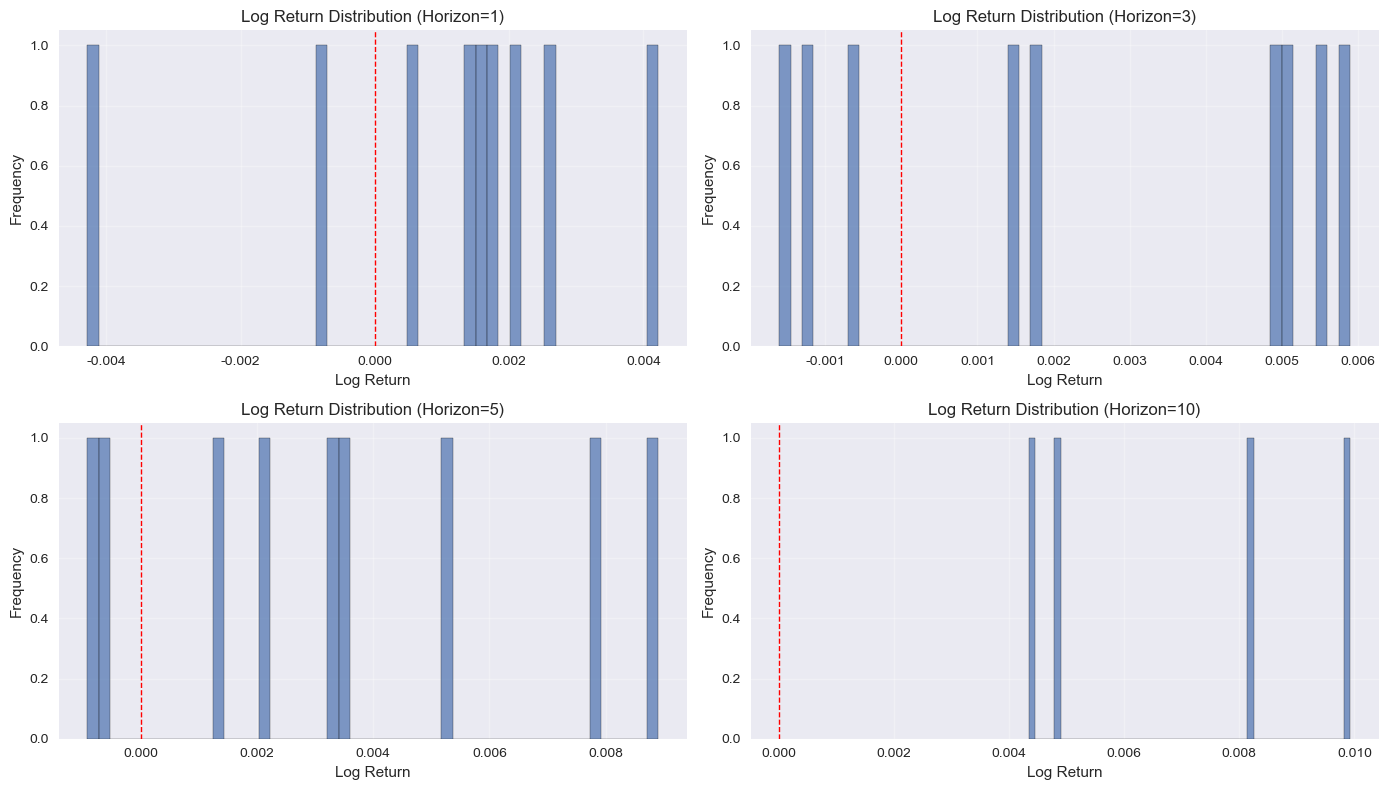

In [ ]:
# 查看标签数据
print("标签数据前5行:")
display(y.head())

print(f"\n标签统计信息:")
display(y.describe())

# 可视化标签分布
fig, axes = plt.subplots(2, 2, figsize=(14, 8))
for i, horizon in enumerate([1, 3, 5, 10]):
    ax = axes[i // 2, i % 2]
    col = f'log_return_{horizon}'
    if col in y.columns:
        y[col].hist(bins=50, ax=ax, alpha=0.7, edgecolor='black')
        ax.set_title(f'Log Return Distribution (Horizon={horizon})')
        ax.set_xlabel('Log Return')
        ax.set_ylabel('Frequency')
        ax.axvline(0, color='red', linestyle='--', linewidth=1)
        ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


In [ ]:
# 训练模型并评估
results = pipeline.train_and_evaluate(
    X, y,
    model_type=model_type,
    target_horizon=target_horizon,
    n_splits=n_splits,
    embargo_bars=embargo_bars
)

print("\n✅ 模型训练与评估完成")


开始训练linear模型...
模型评估完成!
平均Pearson IC: 0.3333
平均Spearman IC: 0.3333
平均RMSE: 0.0672
平均方向准确率: 0.7000

✅ 模型训练与评估完成


/Users/aming/anaconda3/envs/quant/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4916: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
/Users/aming/anaconda3/envs/quant/lib/python3.8/site-packages/numpy/lib/function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/Users/aming/anaconda3/envs/quant/lib/python3.8/site-packages/numpy/lib/function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


In [ ]:
# 查看详细的评估结果
summary = results['summary']

print("="*60)
print("模型评估结果")
print("="*60)
print(f"\n📊 预测能力指标:")
print(f"  Pearson IC (均值):  {summary['pearson_ic_mean']:.4f} (± {summary['pearson_ic_std']:.4f})")
print(f"  Spearman IC (均值): {summary['spearman_ic_mean']:.4f} (± {summary['spearman_ic_std']:.4f})")
print(f"  方向准确率 (均值):  {summary['dir_acc_mean']:.2%} (± {summary['dir_acc_std']:.2%})")

print(f"\n📉 误差指标:")
print(f"  RMSE (均值):        {summary['rmse_mean']:.6f} (± {summary['rmse_std']:.6f})")
print(f"  MAE (均值):         {summary['mae_mean']:.6f} (± {summary['mae_std']:.6f})")

print(f"\n💰 策略收益指标:")
print(f"  夏普比率 (均值):    {summary['sharpe_net_mean']:.4f} (± {summary['sharpe_net_std']:.4f})")

print(f"\n🔢 交叉验证信息:")
print(f"  有效折数:           {summary['n_splits_effective']}/{n_splits}")

print("="*60)


模型评估结果

📊 预测能力指标:


KeyError: 'pearson_ic_std'

In [ ]:
# 查看各折的详细结果
fold_results = results['fold_results']

print("\n各折详细结果:")
fold_df = pd.DataFrame([
    {
        'Fold': i+1,
        'Pearson_IC': fold['pearson_ic'],
        'Spearman_IC': fold['spearman_ic'],
        'Dir_Acc': fold['dir_acc'],
        'RMSE': fold['rmse'],
        'Sharpe': fold['sharpe_net'],
        'Train_Size': fold['train_size'],
        'Test_Size': fold['test_size']
    }
    for i, fold in enumerate(fold_results)
])

display(fold_df)


In [ ]:
# 使用 Pipeline 的可视化方法
pipeline.visualize_results(save_dir=plot_save_dir)
print(f"✅ 可视化结果已保存到: {plot_save_dir}")


In [ ]:
# 额外的可视化：预测值 vs 真实值散点图
predictions = results['predictions']
target_col = f'log_return_{target_horizon}'
y_true = y[target_col].loc[predictions.index]

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# 散点图
axes[0].scatter(y_true, predictions, alpha=0.3, s=10)
axes[0].plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 
             'r--', linewidth=2, label='Perfect Prediction')
axes[0].set_xlabel('True Log Return')
axes[0].set_ylabel('Predicted Log Return')
axes[0].set_title('Predictions vs Truth (Scatter)')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# 时间序列对比
sample_size = min(500, len(predictions))
sample_idx = predictions.index[:sample_size]
axes[1].plot(range(sample_size), y_true.loc[sample_idx].values, 
             label='True', alpha=0.7, linewidth=1)
axes[1].plot(range(sample_size), predictions.loc[sample_idx].values, 
             label='Predicted', alpha=0.7, linewidth=1)
axes[1].set_xlabel('Sample Index')
axes[1].set_ylabel('Log Return')
axes[1].set_title(f'Predictions vs Truth (Time Series, first {sample_size} samples)')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


In [ ]:
# 特征重要性分析
if hasattr(pipeline.model, 'get_feature_importance'):
    importance = pipeline.model.get_feature_importance()
    importance_df = pd.DataFrame([
        {'Feature': k, 'Importance': v}
        for k, v in importance.items()
    ]).sort_values('Importance', ascending=False)
    
    print("\n前20个重要特征:")
    display(importance_df.head(20))
    
    # 可视化前15个特征
    top_n = 15
    top_features = importance_df.head(top_n)
    
    plt.figure(figsize=(10, 6))
    plt.barh(range(top_n), top_features['Importance'].values)
    plt.yticks(range(top_n), top_features['Feature'].values)
    plt.xlabel('Importance')
    plt.title(f'Top {top_n} Feature Importance')
    plt.gca().invert_yaxis()
    plt.grid(True, alpha=0.3, axis='x')
    plt.tight_layout()
    plt.show()
else:
    print("当前模型不支持特征重要性分析")


In [ ]:
# 汇总结果
final_results = {
    'config': {
        'bar_type': bar_type,
        'time_interval': time_interval if bar_type == 'time' else None,
        'dollar_threshold': dollar_threshold if bar_type == 'dollar' else None,
        'feature_window_bars': feature_window_bars,
        'model_type': model_type,
        'target_horizon': target_horizon,
        'date_range': (start_date, end_date),
    },
    'data_stats': {
        'n_trades': len(trades_df),
        'n_bars': len(bars),
        'n_samples': len(X),
        'n_features': len(X.columns),
    },
    'evaluation': results['summary'],
}

print("\n" + "="*60)
print("完整结果摘要")
print("="*60)
print(f"\n📅 配置信息:")
print(f"  日期范围: {start_date} ~ {end_date}")
print(f"  Bar类型: {bar_type.upper()}")
if bar_type == 'time':
    print(f"  时间间隔: {time_interval}")
else:
    print(f"  Dollar阈值: {dollar_threshold:,}")
print(f"  特征窗口: {feature_window_bars} bars")
print(f"  模型类型: {model_type}")
print(f"  目标预测期: {target_horizon} bars")

print(f"\n📊 数据统计:")
print(f"  交易记录数: {len(trades_df):,}")
print(f"  Bar数量: {len(bars):,}")
print(f"  样本数量: {len(X):,}")
print(f"  特征数量: {len(X.columns)}")

print(f"\n🎯 模型表现:")
print(f"  Pearson IC:  {summary['pearson_ic_mean']:.4f} (± {summary['pearson_ic_std']:.4f})")
print(f"  Spearman IC: {summary['spearman_ic_mean']:.4f} (± {summary['spearman_ic_std']:.4f})")
print(f"  方向准确率:  {summary['dir_acc_mean']:.2%} (± {summary['dir_acc_std']:.2%})")
print(f"  夏普比率:    {summary['sharpe_net_mean']:.4f} (± {summary['sharpe_net_std']:.4f})")

print("="*60)
print("\n✅ 所有分析步骤完成！")


In [ ]:
# （可选）保存结果到文件
save_results = False  # 设置为 True 以保存结果

if save_results:
    output_dir = f'{base_path}/pipeline_results'
    os.makedirs(output_dir, exist_ok=True)
    
    # 保存预测结果
    predictions_df = pd.DataFrame({
        'bar_id': predictions.index,
        'prediction': predictions.values,
        'true_value': y_true.values,
    })
    predictions_df.to_csv(f'{output_dir}/predictions.csv', index=False)
    
    # 保存特征数据
    X.to_csv(f'{output_dir}/features.csv')
    
    # 保存标签数据
    y.to_csv(f'{output_dir}/labels.csv')
    
    # 保存bars
    bars.to_csv(f'{output_dir}/bars.csv', index=False)
    
    # 保存评估结果
    import json
    with open(f'{output_dir}/evaluation_summary.json', 'w') as f:
        # 转换 numpy 类型为 Python 原生类型
        summary_json = {k: float(v) if isinstance(v, (np.floating, np.integer)) else v 
                       for k, v in summary.items()}
        json.dump(summary_json, f, indent=2)
    
    print(f"✅ 结果已保存到: {output_dir}")
else:
    print("💡 如需保存结果，请设置 save_results = True")


In [ ]:
# ============ 配置参数 ============
# 特征配置
feature_config = {
    'basic': False,
    'orderflow': True,
    'impact': False,
    'volatility': False,
    'path_shape': False,
    'tail': False,
}

# 模型配置
model_config = {
    'random_state': 42
}

# 数据配置
start_date = '2025-01-01'
end_date = '2025-01-01'

# Bar 配置
bar_type = 'time'  # 'dollar' 或 'time'
time_interval = '1h'  # 仅当 bar_type='time' 时有效
dollar_threshold = 10000 * 60000  # 仅当 bar_type='dollar' 时有效

# 文件路径配置
base_path = '/Users/aming/project/python/crypto-trade/output'
data_path_template = '/Volumes/Ext-Disk/data/futures/um/daily/trades/ETHUSDT/ETHUSDT-trades-{date}.zip'
plot_save_dir = '/Users/aming/project/python/crypto-trade/strategy/fusion/pic'

# 根据 bar_type 生成文件名
if bar_type == 'time':
    trades_zip_path = f'{base_path}/trades-{start_date}-{end_date}-{time_interval}.zip'
    bar_zip_path = f'{base_path}/bars-{start_date}-{end_date}-{time_interval}.zip'
else:
    dollar_threshold_str = str(dollar_threshold).replace("*", "_")
    trades_zip_path = f'{base_path}/trades-{start_date}-{end_date}-{dollar_threshold_str}.zip'
    bar_zip_path = f'{base_path}/bars-{start_date}-{end_date}-{dollar_threshold_str}.zip'

# 训练配置
feature_window_bars = 10  # 用于特征提取的历史 bar 数量
model_type = 'linear'  # 'ridge', 'linear', 'lgbm' 等
target_horizon = 5  # 预测的未来 bar 数量
n_splits = 5  # 交叉验证折数
embargo_bars = 3  # 禁运期（避免数据泄漏）

print("📋 配置参数:")
print(f"  数据日期范围: {start_date} ~ {end_date}")
print(f"  Bar类型: {bar_type}")
if bar_type == 'time':
    print(f"  时间间隔: {time_interval}")
else:
    print(f"  Dollar阈值: {dollar_threshold:,}")
print(f"  模型类型: {model_type}")
print(f"  目标预测期: {target_horizon} bars")
print(f"  特征窗口: {feature_window_bars} bars")


📋 配置参数:
  数据日期范围: 2025-01-01 ~ 2025-01-01
  Bar类型: time
  时间间隔: 1h
  模型类型: linear
  目标预测期: 5 bars
  特征窗口: 10 bars


In [ ]:
# 创建 Pipeline 实例
config = {
    'features': feature_config,
    'model': model_config
}

pipeline = TradingPipeline(config)
print("✅ Pipeline 实例创建成功")


✅ Pipeline 实例创建成功


In [ ]:
# 加载交易数据
trades_df = pipeline.load_data(
    trades_zip_path=trades_zip_path,
    date_range=(start_date, end_date),
    data_path_template=data_path_template
)

# print(f"\n✅ 成功加载 {len(trades_df):,} 条交易记录")
# print(f"   时间范围: {trades_df['timestamp'].min()} ~ {trades_df['timestamp'].max()}")
# print(f"   数据形状: {trades_df.shape}")
# print("\n前5行数据:")
trades_df.head()


,id,price,qty,quote_qty,time,is_buyer_maker
0,4936628773,3336.58,6.583,21964.70614,1735689605058,False
1,4936628774,3336.57,0.033,110.10681,1735689605064,True
2,4936628775,3336.58,1.135,3787.01830,1735689605072,False
3,4936628776,3336.57,0.460,1534.82220,1735689605079,True
4,4936628777,3336.57,0.231,770.74767,1735689605079,True


In [ ]:
# 查看交易数据的基本统计信息
print("交易数据统计:")
print(trades_df.describe())


交易数据统计:
                 id         price           qty     quote_qty          time
count  2.495858e+06  2.495858e+06  2.495858e+06  2.495858e+06  2.495858e+06
mean   4.937877e+09  3.345240e+03  5.093558e-01  1.698517e+03  1.735735e+12
std    7.205685e+05  1.130011e+01  4.285225e+00  1.191547e+04  2.421167e+07
min    4.936629e+09  3.312620e+03  1.000000e-03  1.250000e+00  1.735690e+12
25%    4.937253e+09  3.337590e+03  7.000000e-03  2.338903e+01  1.735717e+12
50%    4.937877e+09  3.345440e+03  1.400000e-02  4.691694e+01  1.735738e+12
75%    4.938501e+09  3.353790e+03  1.500000e-01  5.023065e+02  1.735755e+12
max    4.939125e+09  3.374140e+03  3.759398e+03  5.665142e+06  1.735776e+12


In [ ]:
# 构建 Bars
bars = pipeline.build_bars(
    trades_df,
    dollar_threshold=dollar_threshold,
    bar_zip_path=bar_zip_path,
    bar_type=bar_type,
    time_freq=time_interval if bar_type == 'time' else None
)

# print(f"\n✅ 成功构建 {len(bars):,} 个 {bar_type.upper()} Bars")
# print(f"   时间范围: {bars['start_time'].min()} ~ {bars['end_time'].max()}")
# print(f"   数据形状: {bars.shape}")
# print("\n前5个Bars:")
bars.head()


构建Time Bars（freq=1h）...


KeyboardInterrupt: 

In [ ]:
# 提取特征和标签
X, y = pipeline.extract_features(
    trades_df,
    bars,
    feature_window_bars=feature_window_bars
)

# print(f"\n✅ 特征提取完成")
# print(f"   样本数量: {len(X):,}")
# print(f"   特征数量: {len(X.columns)}")
# print(f"   标签数量: {len(y.columns)}")
# print(f"\n特征列:")
print(X.columns.tolist())


构建交易上下文...
提取特征...
['ofi_signed_qty_sum', 'ofi_signed_quote_sum', 'gof_by_count', 'gof_by_volume', 'feature_start', 'feature_end', 'prediction_time']


In [ ]:
# 查看特征数据
print("特征数据前5行:")
display(X.head())

print(f"\n特征统计信息:")
display(X.describe())


特征数据前5行:


,ofi_signed_qty_sum,ofi_signed_quote_sum,gof_by_count,gof_by_volume,feature_start,feature_end,prediction_time
bar_id,,,,,,,
10,-17491.731,-4.502131e+07,0.048123,-0.034323,2025-01-01 00:00:00,2025-01-01 10:00:00,2025-01-01 11:00:00
11,-37595.305,-1.122991e+08,0.021710,-0.078457,2025-01-01 01:00:00,2025-01-01 11:00:00,2025-01-01 12:00:00
12,-27382.133,-7.818447e+07,0.038381,-0.055608,2025-01-01 02:00:00,2025-01-01 12:00:00,2025-01-01 13:00:00
13,-34238.342,-1.011589e+08,0.029801,-0.069113,2025-01-01 03:00:00,2025-01-01 13:00:00,2025-01-01 14:00:00
14,-42437.515,-1.285471e+08,0.030507,-0.080113,2025-01-01 04:00:00,2025-01-01 14:00:00,2025-01-01 15:00:00



特征统计信息:


,ofi_signed_qty_sum,ofi_signed_quote_sum,gof_by_count,gof_by_volume,feature_start,feature_end,prediction_time
count,9.000000,9.000000e+00,9.000000,9.000000,9,9,9
mean,-36543.708889,-1.087642e+08,0.032216,-0.066010,2025-01-01 04:00:00,2025-01-01 14:00:00,2025-01-01 15:00:00
min,-47930.277000,-1.467437e+08,0.021710,-0.080113,2025-01-01 00:00:00,2025-01-01 10:00:00,2025-01-01 11:00:00
25%,-42437.515000,-1.285471e+08,0.027664,-0.073219,2025-01-01 02:00:00,2025-01-01 12:00:00,2025-01-01 13:00:00
50%,-37595.305000,-1.122991e+08,0.030507,-0.069113,2025-01-01 04:00:00,2025-01-01 14:00:00,2025-01-01 15:00:00
75%,-34238.342000,-1.011589e+08,0.035821,-0.061700,2025-01-01 06:00:00,2025-01-01 16:00:00,2025-01-01 17:00:00
max,-17491.731000,-4.502131e+07,0.048123,-0.034323,2025-01-01 08:00:00,2025-01-01 18:00:00,2025-01-01 19:00:00
std,9493.485309,3.172644e+07,0.007692,0.014148,NaN,NaN,NaN


标签数据前5行:


,log_return_1,t0_time_1,tH_time_1,log_return_3,t0_time_3,tH_time_3,log_return_5,t0_time_5,tH_time_5,log_return_10,t0_time_10,tH_time_10
bar_id,,,,,,,,,,,,
10,0.004221,2025-01-01 11:00:00,2025-01-01 12:00:00,0.005131,2025-01-01 11:00:00,2025-01-01 14:00:00,0.007811,2025-01-01 11:00:00,2025-01-01 16:00:00,0.009930,2025-01-01 11:00:00,2025-01-01 21:00:00
11,0.001777,2025-01-01 12:00:00,2025-01-01 13:00:00,0.001535,2025-01-01 12:00:00,2025-01-01 15:00:00,-0.000695,2025-01-01 12:00:00,2025-01-01 17:00:00,0.008212,2025-01-01 12:00:00,2025-01-01 22:00:00
12,-0.000867,2025-01-01 13:00:00,2025-01-01 14:00:00,0.001812,2025-01-01 13:00:00,2025-01-01 16:00:00,-0.000924,2025-01-01 13:00:00,2025-01-01 18:00:00,0.004339,2025-01-01 13:00:00,2025-01-01 23:00:00
13,0.000625,2025-01-01 14:00:00,2025-01-01 15:00:00,-0.001605,2025-01-01 14:00:00,2025-01-01 17:00:00,0.001405,2025-01-01 14:00:00,2025-01-01 19:00:00,0.004852,2025-01-01 14:00:00,2025-01-02 00:00:00
14,0.002055,2025-01-01 15:00:00,2025-01-01 16:00:00,-0.000682,2025-01-01 15:00:00,2025-01-01 18:00:00,0.003304,2025-01-01 15:00:00,2025-01-01 20:00:00,NaN,2025-01-01 15:00:00,NaT



标签统计信息:


,log_return_1,t0_time_1,tH_time_1,log_return_3,t0_time_3,tH_time_3,log_return_5,t0_time_5,tH_time_5,log_return_10,t0_time_10,tH_time_10
count,9.000000,9,9,9.000000,9,9,9.000000,9,9,4.000000,9,4
mean,0.001007,2025-01-01 15:00:00,2025-01-01 16:00:00,0.002356,2025-01-01 15:00:00,2025-01-01 18:00:00,0.003404,2025-01-01 15:00:00,2025-01-01 20:00:00,0.006833,2025-01-01 15:00:00,2025-01-01 22:30:00
min,-0.004284,2025-01-01 11:00:00,2025-01-01 12:00:00,-0.001605,2025-01-01 11:00:00,2025-01-01 14:00:00,-0.000924,2025-01-01 11:00:00,2025-01-01 16:00:00,0.004339,2025-01-01 11:00:00,2025-01-01 21:00:00
25%,0.000625,2025-01-01 13:00:00,2025-01-01 14:00:00,-0.000682,2025-01-01 13:00:00,2025-01-01 16:00:00,0.001405,2025-01-01 13:00:00,2025-01-01 18:00:00,0.004724,2025-01-01 13:00:00,2025-01-01 21:45:00
50%,0.001548,2025-01-01 15:00:00,2025-01-01 16:00:00,0.001812,2025-01-01 15:00:00,2025-01-01 18:00:00,0.003304,2025-01-01 15:00:00,2025-01-01 20:00:00,0.006532,2025-01-01 15:00:00,2025-01-01 22:30:00
75%,0.002055,2025-01-01 17:00:00,2025-01-01 18:00:00,0.005131,2025-01-01 17:00:00,2025-01-01 20:00:00,0.005263,2025-01-01 17:00:00,2025-01-01 22:00:00,0.008641,2025-01-01 17:00:00,2025-01-01 23:15:00
max,0.004221,2025-01-01 19:00:00,2025-01-01 20:00:00,0.005897,2025-01-01 19:00:00,2025-01-01 22:00:00,0.008906,2025-01-01 19:00:00,2025-01-02 00:00:00,0.009930,2025-01-01 19:00:00,2025-01-02 00:00:00
std,0.002410,NaN,NaN,0.003075,NaN,NaN,0.003434,NaN,NaN,0.002685,NaN,NaN


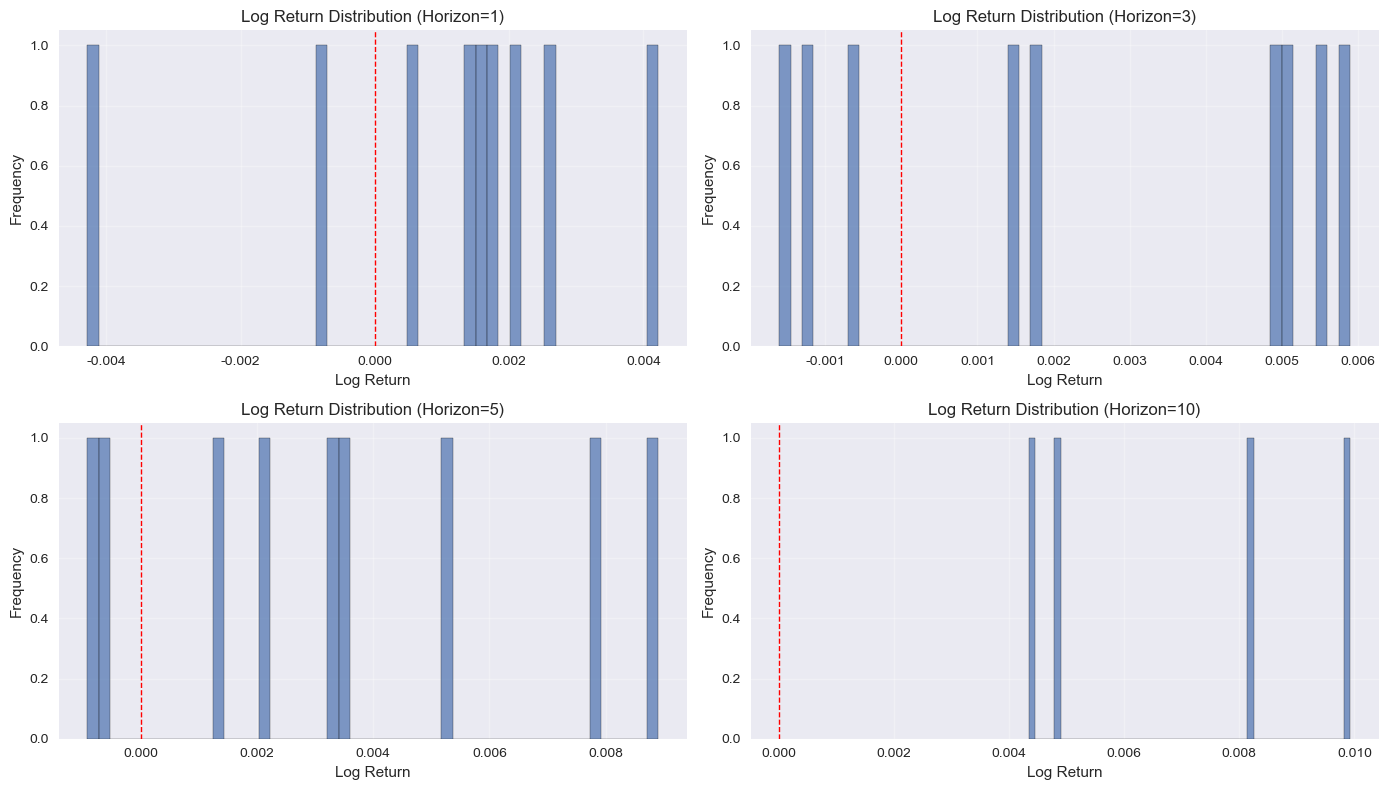

In [ ]:
# 查看标签数据
print("标签数据前5行:")
display(y.head())

print(f"\n标签统计信息:")
display(y.describe())

# 可视化标签分布
fig, axes = plt.subplots(2, 2, figsize=(14, 8))
for i, horizon in enumerate([1, 3, 5, 10]):
    ax = axes[i // 2, i % 2]
    col = f'log_return_{horizon}'
    if col in y.columns:
        y[col].hist(bins=50, ax=ax, alpha=0.7, edgecolor='black')
        ax.set_title(f'Log Return Distribution (Horizon={horizon})')
        ax.set_xlabel('Log Return')
        ax.set_ylabel('Frequency')
        ax.axvline(0, color='red', linestyle='--', linewidth=1)
        ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


In [ ]:
# 训练模型并评估
results = pipeline.train_and_evaluate(
    X, y,
    model_type=model_type,
    target_horizon=target_horizon,
    n_splits=n_splits,
    embargo_bars=embargo_bars
)

print("\n✅ 模型训练与评估完成")


开始训练linear模型...
模型评估完成!
平均Pearson IC: 0.3333
平均Spearman IC: 0.3333
平均RMSE: 0.0672
平均方向准确率: 0.7000

✅ 模型训练与评估完成


/Users/aming/anaconda3/envs/quant/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4916: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
/Users/aming/anaconda3/envs/quant/lib/python3.8/site-packages/numpy/lib/function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/Users/aming/anaconda3/envs/quant/lib/python3.8/site-packages/numpy/lib/function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


In [ ]:
# 查看详细的评估结果
summary = results['summary']

print("="*60)
print("模型评估结果")
print("="*60)
print(f"\n📊 预测能力指标:")
print(f"  Pearson IC (均值):  {summary['pearson_ic_mean']:.4f} (± {summary['pearson_ic_std']:.4f})")
print(f"  Spearman IC (均值): {summary['spearman_ic_mean']:.4f} (± {summary['spearman_ic_std']:.4f})")
print(f"  方向准确率 (均值):  {summary['dir_acc_mean']:.2%} (± {summary['dir_acc_std']:.2%})")

print(f"\n📉 误差指标:")
print(f"  RMSE (均值):        {summary['rmse_mean']:.6f} (± {summary['rmse_std']:.6f})")
print(f"  MAE (均值):         {summary['mae_mean']:.6f} (± {summary['mae_std']:.6f})")

print(f"\n💰 策略收益指标:")
print(f"  夏普比率 (均值):    {summary['sharpe_net_mean']:.4f} (± {summary['sharpe_net_std']:.4f})")

print(f"\n🔢 交叉验证信息:")
print(f"  有效折数:           {summary['n_splits_effective']}/{n_splits}")

print("="*60)


模型评估结果

📊 预测能力指标:


KeyError: 'pearson_ic_std'

In [ ]:
# 查看各折的详细结果
fold_results = results['fold_results']

print("\n各折详细结果:")
fold_df = pd.DataFrame([
    {
        'Fold': i+1,
        'Pearson_IC': fold['pearson_ic'],
        'Spearman_IC': fold['spearman_ic'],
        'Dir_Acc': fold['dir_acc'],
        'RMSE': fold['rmse'],
        'Sharpe': fold['sharpe_net'],
        'Train_Size': fold['train_size'],
        'Test_Size': fold['test_size']
    }
    for i, fold in enumerate(fold_results)
])

display(fold_df)


In [ ]:
# 使用 Pipeline 的可视化方法
pipeline.visualize_results(save_dir=plot_save_dir)
print(f"✅ 可视化结果已保存到: {plot_save_dir}")


In [ ]:
# 额外的可视化：预测值 vs 真实值散点图
predictions = results['predictions']
target_col = f'log_return_{target_horizon}'
y_true = y[target_col].loc[predictions.index]

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# 散点图
axes[0].scatter(y_true, predictions, alpha=0.3, s=10)
axes[0].plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 
             'r--', linewidth=2, label='Perfect Prediction')
axes[0].set_xlabel('True Log Return')
axes[0].set_ylabel('Predicted Log Return')
axes[0].set_title('Predictions vs Truth (Scatter)')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# 时间序列对比
sample_size = min(500, len(predictions))
sample_idx = predictions.index[:sample_size]
axes[1].plot(range(sample_size), y_true.loc[sample_idx].values, 
             label='True', alpha=0.7, linewidth=1)
axes[1].plot(range(sample_size), predictions.loc[sample_idx].values, 
             label='Predicted', alpha=0.7, linewidth=1)
axes[1].set_xlabel('Sample Index')
axes[1].set_ylabel('Log Return')
axes[1].set_title(f'Predictions vs Truth (Time Series, first {sample_size} samples)')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


In [ ]:
# 特征重要性分析
if hasattr(pipeline.model, 'get_feature_importance'):
    importance = pipeline.model.get_feature_importance()
    importance_df = pd.DataFrame([
        {'Feature': k, 'Importance': v}
        for k, v in importance.items()
    ]).sort_values('Importance', ascending=False)
    
    print("\n前20个重要特征:")
    display(importance_df.head(20))
    
    # 可视化前15个特征
    top_n = 15
    top_features = importance_df.head(top_n)
    
    plt.figure(figsize=(10, 6))
    plt.barh(range(top_n), top_features['Importance'].values)
    plt.yticks(range(top_n), top_features['Feature'].values)
    plt.xlabel('Importance')
    plt.title(f'Top {top_n} Feature Importance')
    plt.gca().invert_yaxis()
    plt.grid(True, alpha=0.3, axis='x')
    plt.tight_layout()
    plt.show()
else:
    print("当前模型不支持特征重要性分析")


In [ ]:
# 汇总结果
final_results = {
    'config': {
        'bar_type': bar_type,
        'time_interval': time_interval if bar_type == 'time' else None,
        'dollar_threshold': dollar_threshold if bar_type == 'dollar' else None,
        'feature_window_bars': feature_window_bars,
        'model_type': model_type,
        'target_horizon': target_horizon,
        'date_range': (start_date, end_date),
    },
    'data_stats': {
        'n_trades': len(trades_df),
        'n_bars': len(bars),
        'n_samples': len(X),
        'n_features': len(X.columns),
    },
    'evaluation': results['summary'],
}

print("\n" + "="*60)
print("完整结果摘要")
print("="*60)
print(f"\n📅 配置信息:")
print(f"  日期范围: {start_date} ~ {end_date}")
print(f"  Bar类型: {bar_type.upper()}")
if bar_type == 'time':
    print(f"  时间间隔: {time_interval}")
else:
    print(f"  Dollar阈值: {dollar_threshold:,}")
print(f"  特征窗口: {feature_window_bars} bars")
print(f"  模型类型: {model_type}")
print(f"  目标预测期: {target_horizon} bars")

print(f"\n📊 数据统计:")
print(f"  交易记录数: {len(trades_df):,}")
print(f"  Bar数量: {len(bars):,}")
print(f"  样本数量: {len(X):,}")
print(f"  特征数量: {len(X.columns)}")

print(f"\n🎯 模型表现:")
print(f"  Pearson IC:  {summary['pearson_ic_mean']:.4f} (± {summary['pearson_ic_std']:.4f})")
print(f"  Spearman IC: {summary['spearman_ic_mean']:.4f} (± {summary['spearman_ic_std']:.4f})")
print(f"  方向准确率:  {summary['dir_acc_mean']:.2%} (± {summary['dir_acc_std']:.2%})")
print(f"  夏普比率:    {summary['sharpe_net_mean']:.4f} (± {summary['sharpe_net_std']:.4f})")

print("="*60)
print("\n✅ 所有分析步骤完成！")


In [ ]:
# （可选）保存结果到文件
save_results = False  # 设置为 True 以保存结果

if save_results:
    output_dir = f'{base_path}/pipeline_results'
    os.makedirs(output_dir, exist_ok=True)
    
    # 保存预测结果
    predictions_df = pd.DataFrame({
        'bar_id': predictions.index,
        'prediction': predictions.values,
        'true_value': y_true.values,
    })
    predictions_df.to_csv(f'{output_dir}/predictions.csv', index=False)
    
    # 保存特征数据
    X.to_csv(f'{output_dir}/features.csv')
    
    # 保存标签数据
    y.to_csv(f'{output_dir}/labels.csv')
    
    # 保存bars
    bars.to_csv(f'{output_dir}/bars.csv', index=False)
    
    # 保存评估结果
    import json
    with open(f'{output_dir}/evaluation_summary.json', 'w') as f:
        # 转换 numpy 类型为 Python 原生类型
        summary_json = {k: float(v) if isinstance(v, (np.floating, np.integer)) else v 
                       for k, v in summary.items()}
        json.dump(summary_json, f, indent=2)
    
    print(f"✅ 结果已保存到: {output_dir}")
else:
    print("💡 如需保存结果，请设置 save_results = True")
